In [1]:
# !pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
image = X_train[0]

__cv2.calcHist(images, channels, mask, histSize, ranges)__ 取得統計後的直方圖值：

* images：要分析的圖片。
* channels：產生的直方圖類型，例如：\[0\] → 灰度圖，\[0, 1, 2\] → RGB 三色。
* mask：若有提供則僅計算 mask 部份的直方圖(Optional)。
* histSize：像素的切分數目，預設為 256。每個 channel 皆可指定一個範圍。例如：\[32, 32, 32\] 表示 RGB channels 皆切分為 32 區段。
* ranges：像素的範圍，預設為 \[0, 256\]，表示 \[0, 256)。

## 灰階圖片

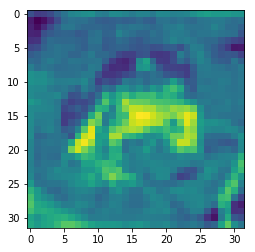

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

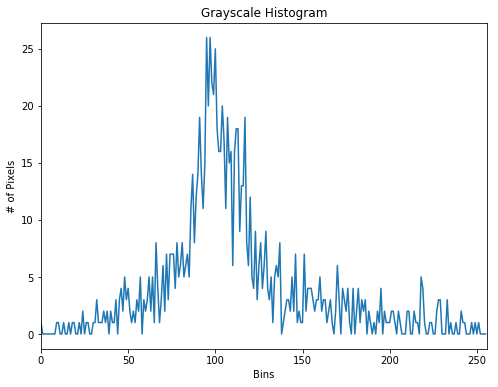

In [6]:
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure(figsize=(8, 6,))
plt.plot(hist)
plt.xlim([0, 256])
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.title('Grayscale Histogram')
plt.show()

## 彩色圖片

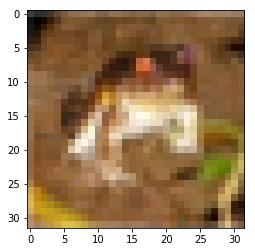

In [7]:
plt.imshow(image)
plt.show()

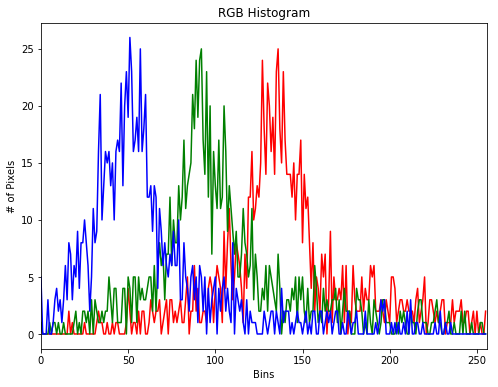

In [8]:
chans = cv2.split(image) # 把圖像的 RGB channel 切分出來
hists = [cv2.calcHist([chan], [0], None, [256], [0, 256]) for chan in chans]
colors = ('r', 'g', 'b',)

plt.figure(figsize=(8, 6,))
for hist, color in zip(hists, colors):
    plt.plot(hist, color=color)
plt.xlim([0, 256])
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.title('RGB Histogram')
plt.show()

## 作業

畫出 16 個 bin 的顏色直方圖, 並嘗試回答每個 channel 在 \[16, 32\] 這個 bin 中有多少個像素。